# Extra::Avoiding Diffusive effect in Convective Equation (Unfinished) - Variable Lattice Sound Sped

Considering that we want reduce the diffusive effects on the LBM convective equation description:

$$
\partial_t u + \partial_{\alpha}B_{\alpha} + \underbrace{\partial_{\alpha}\left(\nu \partial_{\alpha}u \right)}_{\approx 0}  = 0
$$

a option is become the diffusive term null (i.e. $\tau =1/2$ due to $\nu=c_{s}^{2}(\tau -1/2)$) or use higher-order parameter to correct these lower-order moments. In the sequence we will explore both scenarios.

## LBM $\times$ FDM relations

### LBM for $\tau=1$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
matplotlib.rcParams['mathtext.fontset'] = 'cm'
#***************************************InputParameters************************************************
Nx=126 #Square Domain Length
#***************************************Lattice-Properties-D1Q5*************************************************
cs=1.0/sqrt(3.0);
w = np.array([4.0/6.0, 1.0/6.0, 1.0/6.0],dtype="float64")
cx = np.array([0, 1, -1],dtype="int16")  
L = 20.0            # Length of the reservoir
T = 10.0             # Total simulation time
dx = L / (Nx-1)       # Spatial step size
c=2**(2)            # c=dx/dt
dt=dx/c             # Time step size
nt = int(T / dt)    # Time step number
uo=1.0              # Constant Fluid Flux
tau=1.0             # Relaxation Time 
m=1.0               # Dynamic Viscosity ration
nuo=(tau-0.5)/3.0*dx**2/dt
print('dx=',dx,'\t dt=',dt)
print('nuo=',nuo)
#***************************************LBM-Scale************************************************
ue=uo/c
sk=np.zeros((Nx),dtype="float64")
Bx=np.zeros((Nx),dtype="float64")
f=np.zeros((3,Nx),dtype="float64")
for k in range(0,3):
    f[k,:]=w[k]*(sk[:]+cx[k]*Bx[:]*3.0)
for t in range(nt):
    #----------------------Macro------------------
    sk[:]=f[0,:]+f[1,:]+f[2,:]
    Bx=ue*sk*sk/(sk*sk+(1.0-sk)**(2.0))
    #--------------------Collision----------------
    for k in range(0,3):
        f[k,:]=w[k]*(sk[:]+cx[k]*Bx[:]/cs**2) + (1.0 - 1.0/tau)*(f[k,:] -w[k]*(sk[:]+cx[k]*Bx[:]/cs**2))
    #-----------------streaming-------------------
    for k in range(0,3):
        f[k,:]=np.roll(f[k,:], cx[k], axis=0)
    #-----------------Boundaries-----------------------
    f[1,0]= 1.0 - f[0,0]-f[2,0]
    f[0,Nx-1]=f[0,Nx-2]
    f[1,Nx-1]=f[1,Nx-2]
    f[2,Nx-1]=f[2,Nx-2]

dx= 0.16 	 dt= 0.04
nuo= 0.10666666666666667


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
matplotlib.rcParams['mathtext.fontset'] = 'cm'
#----------------------------Simulation-Set--------------------------------------------------------
Nx=126;
L = 20.0            # Length of the reservoir
T = 10.0             # Total simulation time
dx = L / (Nx-1)       # Spatial step size
c=2**(2)            # c=dx/dt
dt=dx/c             # Time step size
nt = int(T / dt)    # Time step number
uo=1.0              # Constant Fluid Flux
nuof=dx**2/dt/6.0*1.0              # Diffusive term
m=1.0               # Dynamic Viscosity ration
print('dx=',dx,'\t dt=',dt)
print('nuo=',nuof)
#----------------------------Initilizing-Simulation------------------------------------------------
sf=np.zeros((Nx),dtype="float64")  # Allocating Density Field
sfo=np.zeros((Nx),dtype="float64") # Allocating Density Buffer Field
sf[:]=0.0                          # Initilal Density Condition
Bx=np.zeros((Nx),dtype="float64")             # Allocating Convective Term
Bx=uo*sf**(2.0)/(sf**(2.0)+m*(1.0-sf)**(2.0)) # Initializing Convective Term
for t in range(nt):
# for t in range(3):
    sf=sfo
    Bx=uo*sf**(2.0)/(sf**(2.0)+m*(1.0-sf)**(2.0))
    sfo = ( sf + dt/dx * (np.roll(Bx, cx[1], axis=0) - np.roll(Bx, cx[2], axis=0))/2.0 +
           ( np.roll(sf, cx[1], axis=0) -2.0*sf + np.roll(sf, cx[2], axis=0))*dt/dx**2*nuo )
    sfo[0] = 1.0     # Inlet boundary condition
    sfo[Nx-1] = 0.0  # Inlet boundary condition

dx= 0.16 	 dt= 0.04
nuo= 0.10666666666666667


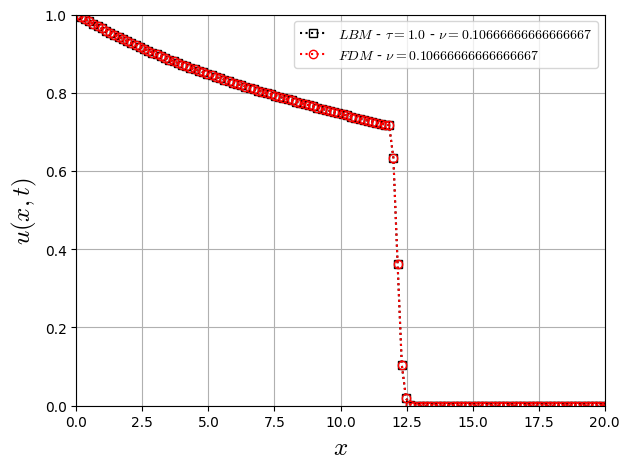

In [11]:
x = np.linspace(0, L, Nx)
plt.plot(x, sk, 'k:s' ,label=f'$LBM$ - $\\tau={tau}$ - $\\nu={nuo}$', fillstyle='none')
plt.plot(x, sf, 'r:o' ,label=f'$FDM$ - $\\nu={nuof}$', fillstyle='none')
plt.xlabel(r"$x$",fontsize=18)
plt.ylabel(r"$u(x,t)$",fontsize=18)
plt.xlim(0,20)
plt.ylim(0,1)
plt.legend()
plt.grid(True)
plt.tight_layout()

### LBM for $\tau\neq1$

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
matplotlib.rcParams['mathtext.fontset'] = 'cm'
#***************************************InputParameters************************************************
Nx=126 #Square Domain Length
#***************************************Lattice-Properties-D1Q5*************************************************
cs=1.0/sqrt(3.0);
w = np.array([4.0/6.0, 1.0/6.0, 1.0/6.0],dtype="float64")
cx = np.array([0, 1, -1],dtype="int16")  
L = 20.0            # Length of the reservoir
T = 10.0             # Total simulation time
dx = L / (Nx-1)       # Spatial step size
c=2**(2)            # c=dx/dt
dt=dx/c             # Time step size
nt = int(T / dt)    # Time step number
uo=1.0              # Constant Fluid Flux
tau=0.95             # Relaxation Time 
m=1.0               # Dynamic Viscosity ration
nuo=(tau-0.5)/3.0*dx**2/dt
print('dx=',dx,'\t dt=',dt)
print('nuo=',nuo)
#***************************************LBM-Scale************************************************
ue=uo/c
sk=np.zeros((Nx),dtype="float64")
Bx=np.zeros((Nx),dtype="float64")
f=np.zeros((3,Nx),dtype="float64")
for k in range(0,3):
    f[k,:]=w[k]*(sk[:]+cx[k]*Bx[:]*3.0)
for t in range(nt):
    #----------------------Macro------------------
    sk[:]=f[0,:]+f[1,:]+f[2,:]
    Bx=ue*sk*sk/(sk*sk+(1.0-sk)**(2.0))
    #--------------------Collision----------------
    for k in range(0,3):
        f[k,:]=w[k]*(sk[:]+cx[k]*Bx[:]/cs**2) + (1.0 - 1.0/tau)*(f[k,:] -w[k]*(sk[:]+cx[k]*Bx[:]/cs**2))
    #-----------------streaming-------------------
    for k in range(0,3):
        f[k,:]=np.roll(f[k,:], cx[k], axis=0)
    #-----------------Boundaries-----------------------
    f[1,0]= 1.0 - f[0,0]-f[2,0]
    f[0,Nx-1]=f[0,Nx-2]
    f[1,Nx-1]=f[1,Nx-2]
    f[2,Nx-1]=f[2,Nx-2]

dx= 0.16 	 dt= 0.04
nuo= 0.096


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
matplotlib.rcParams['mathtext.fontset'] = 'cm'
#----------------------------Simulation-Set--------------------------------------------------------
Nx=126;
L = 20.0            # Length of the reservoir
T = 10.0             # Total simulation time
dx = L / (Nx-1)       # Spatial step size
c=2**(2)            # c=dx/dt
dt=dx/c             # Time step size
nt = int(T / dt)    # Time step number
uo=1.0              # Constant Fluid Flux
nuof=dx**2/dt/6.0*0.9              # Diffusive term
tau=0.95
m=1.0               # Dynamic Viscosity ration
print('dx=',dx,'\t dt=',dt)
print('nuo=',nuof)
#----------------------------Initilizing-Simulation------------------------------------------------
sf=np.zeros((Nx),dtype="float64")  # Allocating Density Field
sfo=np.zeros((Nx),dtype="float64") # Allocating Density Buffer Field
sf[:]=0.0                          # Initilal Density Condition
Bx=np.zeros((Nx),dtype="float64")             # Allocating Convective Term
Bx=uo*sf**(2.0)/(sf**(2.0)+m*(1.0-sf)**(2.0)) # Initializing Convective Term
for t in range(nt):
# for t in range(3):
    sf=sfo
    Bx=uo*sf**(2.0)/(sf**(2.0)+m*(1.0-sf)**(2.0))
    # sfo = ( sf + dt/dx * (np.roll(Bx, cx[1], axis=0) - np.roll(Bx, cx[2], axis=0))/2.0 +
    #        ( np.roll(sf, cx[1], axis=0) -2.0*sf + np.roll(sf, cx[2], axis=0))*dt/dx**2*nuo )
    sfo = ( (4.0*sf/6.0 + np.roll(sf, cx[1], axis=0)/6.0 + np.roll(sf, cx[2], axis=0)/6.0) 
           + dt/dx * (np.roll(Bx, cx[1], axis=0) - np.roll(Bx, cx[2], axis=0))/2.0 ) *1.0/tau + (1.0 - 1.0/tau)*(4.0*sf/6.0 + np.roll(sf, cx[1], axis=0)/6.0 + np.roll(sf, cx[2], axis=0)/6.0) 
    sfo[0] = 1.0     # Inlet boundary condition
    sfo[Nx-1] = 0.0  # Inlet boundary condition

dx= 0.16 	 dt= 0.04
nuo= 0.096


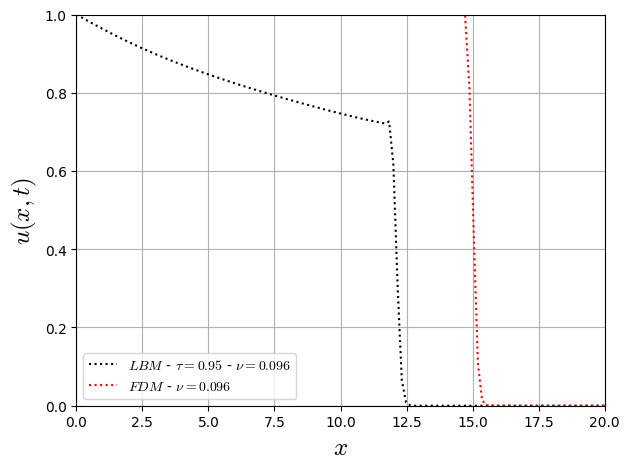

In [25]:
x = np.linspace(0, L, Nx)
plt.plot(x, sk, 'k:' ,label=f'$LBM$ - $\\tau={tau}$ - $\\nu={nuo}$', fillstyle='none')
plt.plot(x, sf, 'r:' ,label=f'$FDM$ - $\\nu={nuof}$', fillstyle='none')
plt.xlabel(r"$x$",fontsize=18)
plt.ylabel(r"$u(x,t)$",fontsize=18)
plt.xlim(0,20)
plt.ylim(0,1)
plt.legend()
plt.grid(True)
plt.tight_layout()

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
matplotlib.rcParams['mathtext.fontset'] = 'cm'
#***************************************InputParameters************************************************
Nx=126 #Square Domain Length
#***************************************Lattice-Properties-D1Q5*************************************************
cs=1.0/sqrt(3.0);
w = np.array([4.0/6.0, 1.0/6.0, 1.0/6.0],dtype="float64")
cx = np.array([0, 1, -1],dtype="int16")  
L = 20.0            # Length of the reservoir
T = 10.0             # Total simulation time
dx = L / (Nx-1)       # Spatial step size
c=2**(2)            # c=dx/dt
dt=dx/c             # Time step size
nt = int(T / dt)    # Time step number
uo=1.0              # Constant Fluid Flux
m=1.0               # Dynamic Viscosity ration
print('dx=',dx,'\t dt=',dt)
#***************************************LBM-Scale************************************************
ue=uo/c
sk=np.zeros((Nx),dtype="float64")
Bx=np.zeros((Nx),dtype="float64")
f=np.zeros((3,Nx),dtype="float64")
for k in range(0,3):
    f[k,:]=w[k]*(sk[:]+cx[k]*Bx[:]*3.0)
for t in range(nt):
    #----------------------Macro------------------
    sk[:]=f[0,:]+f[1,:]+f[2,:]
    Bx=ue*sk*sk/(sk*sk+(1.0-sk)**(2.0))
    #--------------------Collision----------------
    for k in range(0,3):
        f[k,:]=w[k]*(sk[:]+cx[k]*Bx[:]/cs**2)
    #-----------------streaming-------------------
    for k in range(0,3):
        f[k,:]=np.roll(f[k,:], cx[k], axis=0)
    #-----------------Boundaries-----------------------
    f[1,0]= 1.0 - f[0,0]-f[2,0]
    f[0,Nx-1]=f[0,Nx-2]
    f[1,Nx-1]=f[1,Nx-2]
    f[2,Nx-1]=f[2,Nx-2]

dx= 0.16 	 dt= 0.04


In [54]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
matplotlib.rcParams['mathtext.fontset'] = 'cm'
#***************************************InputParameters************************************************
Nx=126 #Square Domain Length
#***************************************Lattice-Properties-D1Q5*************************************************
cs=1.0/sqrt(3.0);
w = np.array([4.0/6.0, 1.0/6.0, 1.0/6.0],dtype="float64")
cx = np.array([0, 1, -1],dtype="int16")  
L = 20.0            # Length of the reservoir
T = 10.0             # Total simulation time
dx = L / (Nx-1)       # Spatial step size
c=2**(2)            # c=dx/dt
dt=dx/c             # Time step size
nt = int(T / dt)    # Time step number
uo=1.0              # Constant Fluid Flux
tau=0.95             # Relaxation Time 
m=1.0               # Dynamic Viscosity ration
print('dx=',dx,'\t dt=',dt)
print('nuo=',(tau-0.5)/3.0*dx**2/dt)
#***************************************LBM-Scale************************************************
ue=uo/c
sk2=np.zeros((Nx),dtype="float64")
Bx=np.zeros((Nx),dtype="float64")
f=np.zeros((3,Nx),dtype="float64")
for k in range(0,3):
    f[k,:]=w[k]*(sk2[:]+cx[k]*Bx[:]*3.0)
for t in range(nt):
    #----------------------Macro------------------
    sk2[:]=f[0,:]+f[1,:]+f[2,:]
    Bx=ue*sk2*sk2/(sk2*sk2+(1.0-sk2)**(2.0))
    #--------------------Collision----------------
    for k in range(0,3):
        f[k,:]=w[k]*(sk2[:]+cx[k]*Bx[:]/cs**2) + (1.0 - 1.0/tau)*(f[k,:] -w[k]*(sk2[:]+cx[k]*Bx[:]/cs**2))
    #-----------------streaming-------------------
    for k in range(0,3):
        f[k,:]=np.roll(f[k,:], cx[k], axis=0)
    #-----------------Boundaries-----------------------
    f[1,0]= 1.0 - f[0,0]-f[2,0]
    f[0,Nx-1]=f[0,Nx-2]
    f[1,Nx-1]=f[1,Nx-2]
    f[2,Nx-1]=f[2,Nx-2]

dx= 0.16 	 dt= 0.04
nuo= 0.096


In [55]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
matplotlib.rcParams['mathtext.fontset'] = 'cm'
#----------------------------Simulation-Set--------------------------------------------------------
Nx=126;
L = 20.0            # Length of the reservoir
T = 10.0             # Total simulation time
dx = L / (Nx-1)       # Spatial step size
c=2**(2)            # c=dx/dt
dt=dx/c             # Time step size
nt = int(T / dt)    # Time step number
uo=1.0              # Constant Fluid Flux
m=1.0               # Dynamic Viscosity ration
print('dx=',dx,'\t dt=',dt)
#----------------------------Initilizing-Simulation------------------------------------------------
sf=np.zeros((Nx),dtype="float64")  # Allocating Density Field
sfo=np.zeros((Nx),dtype="float64") # Allocating Density Buffer Field
sf[:]=0.0                          # Initilal Density Condition
Bx=np.zeros((Nx),dtype="float64")             # Allocating Convective Term
Bx=uo*sf**(2.0)/(sf**(2.0)+m*(1.0-sf)**(2.0)) # Initializing Convective Term
for t in range(nt):
# for t in range(3):
    sf=sfo
    Bx=uo*sf**(2.0)/(sf**(2.0)+m*(1.0-sf)**(2.0))
    sfo = ( (4.0*sf/6.0 + np.roll(sf, cx[1], axis=0)/6.0 + np.roll(sf, cx[2], axis=0)/6.0) 
           + dt/dx * (np.roll(Bx, cx[1], axis=0) - np.roll(Bx, cx[2], axis=0))/2.0 )
    sfo[0] = 1.0     # Inlet boundary condition
    sfo[Nx-1] = 0.0  # Inlet boundary condition

dx= 0.16 	 dt= 0.04


In [56]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
matplotlib.rcParams['mathtext.fontset'] = 'cm'
#----------------------------Simulation-Set--------------------------------------------------------
Nx=126;
L = 20.0            # Length of the reservoir
T = 10.0             # Total simulation time
dx = L / (Nx-1)       # Spatial step size
c=2**(2)            # c=dx/dt
dt=dx/c             # Time step size
nt = int(T / dt)    # Time step number
uo=1.0              # Constant Fluid Flux
nuo=dx**2/dt/6.0*0.9              # Diffusive term
m=1.0               # Dynamic Viscosity ration
print('dx=',dx,'\t dt=',dt)
print('nuo=',nuo)
#----------------------------Initilizing-Simulation------------------------------------------------
sf1=np.zeros((Nx),dtype="float64")  # Allocating Density Field
sf1o=np.zeros((Nx),dtype="float64") # Allocating Density Buffer Field
sf1[:]=0.0                          # Initilal Density Condition
Bx=np.zeros((Nx),dtype="float64")             # Allocating Convective Term
Bx=uo*sf1**(2.0)/(sf1**(2.0)+m*(1.0-sf1)**(2.0)) # Initializing Convective Term
for t in range(nt):
# for t in range(3):
    sf1=sf1o
    Bx=uo*sf1**(2.0)/(sf1**(2.0)+m*(1.0-sf1)**(2.0))
    sf1o = ( sf1 + dt/dx * (np.roll(Bx, cx[1], axis=0) - np.roll(Bx, cx[2], axis=0))/2.0 +
           ( np.roll(sf1, cx[1], axis=0) -2.0*sf1 + np.roll(sf1, cx[2], axis=0))*dt/dx**2*nuo )
    sf1o[0] = 1.0     # Inlet boundary condition
    sf1o[Nx-1] = 0.0  # Inlet boundary condition

dx= 0.16 	 dt= 0.04
nuo= 0.096


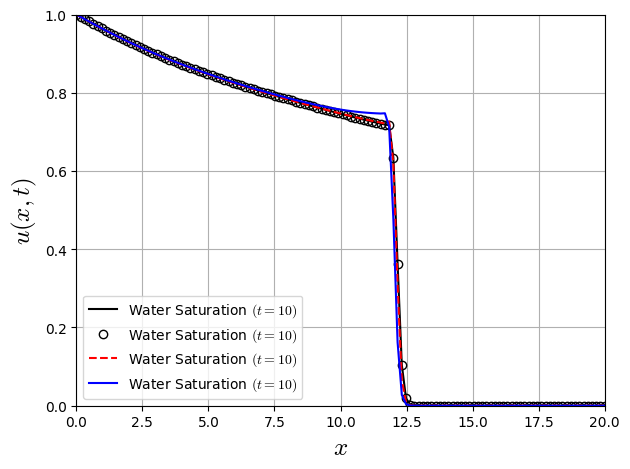

In [59]:
x = np.linspace(0, L, Nx)
plt.plot(x, sk, 'k-' ,label='Water Saturation $(t=10)$')
plt.plot(x, sf, 'ko' ,label='Water Saturation $(t=10)$', fillstyle='none')
plt.plot(x, sk2, 'r--' ,label='Water Saturation $(t=10)$')
plt.plot(x, sf1, 'b-' ,label='Water Saturation $(t=10)$', fillstyle='none')
plt.xlabel(r"$x$",fontsize=18)
plt.ylabel(r"$u(x,t)$",fontsize=18)
plt.xlim(0,20)
plt.ylim(0,1)
plt.legend()
plt.grid(True)
plt.tight_layout()

### LBM D1Q3 (FTCS-SD): Variable Lattice Sound Speed (Diffusive Effect Analysis)

```{toggle}

```python
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
matplotlib.rcParams['mathtext.fontset'] = 'cm'
#***************************************InputParameters************************************************
Nx=126 #Square Domain Length
#***************************************Lattice-Properties-D1Q5*************************************************
cs=1.0/sqrt(4.5);
w = np.array([7.0/9.0, 1.0/9.0, 1.0/9.0],dtype="float64")
cx = np.array([0, 1, -1],dtype="int16")  
L = 20.0            # Length of the reservoir
T = 10.0             # Total simulation time
dx = L / (Nx-1)       # Spatial step size
c=2**(3)            # c=dx/dt
dt=dx/c             # Time step size
nt = int(T / dt)    # Time step number
uo=1.0              # Constant Fluid Flux
m=1.0               # Dynamic Viscosity ration
print('dx=',dx,'\t dt=',dt)
#***************************************LBM-Scale************************************************
ue=uo/c
sk1=np.zeros((Nx),dtype="float64")
Bx=np.zeros((Nx),dtype="float64")
f=np.zeros((3,Nx),dtype="float64")
for k in range(0,3):
    f[k,:]=w[k]*(sk1[:]+cx[k]*Bx[:]/cs**2)
for t in range(nt):
    #----------------------Macro------------------
    sk1[:]=f[0,:]+f[1,:]+f[2,:]
    Bx=ue*sk1*sk1/(sk1*sk1+(1.0-sk1)**(2.0))
    #--------------------Collision----------------
    for k in range(0,3):
        f[k,:]=w[k]*(sk1[:]+cx[k]*Bx[:]/cs**2)
    #-----------------streaming-------------------
    for k in range(0,3):
        f[k,:]=np.roll(f[k,:], cx[k], axis=0)
    #-----------------Boundaries-----------------------
    f[1,0]= 1.0 - f[0,0]-f[2,0]
    f[0,Nx-1]=f[0,Nx-2]
    f[1,Nx-1]=f[1,Nx-2]
    f[2,Nx-1]=f[2,Nx-2]
x = np.linspace(0, L, Nx)
plt.plot(x, sk1, 'k-' ,label='Water Saturation $(t=10)$')
plt.xlabel(r"$x$",fontsize=18)
plt.ylabel(r"$u(x,t)$",fontsize=18)
plt.xlim(0,20)
plt.ylim(0,1)
plt.legend()
plt.grid(True)
plt.tight_layout()
```

```{toggle}

```python
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
matplotlib.rcParams['mathtext.fontset'] = 'cm'
#***************************************InputParameters************************************************
Nx=126 #Square Domain Length
#***************************************Lattice-Properties-D1Q5*************************************************
cs=1.0/sqrt(9.0);
w = np.array([8.0/9.0, 1.0/18.0, 1.0/18.0],dtype="float64")
cx = np.array([0, 1, -1],dtype="int16")  
L = 20.0            # Length of the reservoir
T = 10.0             # Total simulation time
dx = L / (Nx-1)       # Spatial step size
c=2**(4)            # c=dx/dt
dt=dx/c             # Time step size
nt = int(T / dt)    # Time step number
uo=1.0              # Constant Fluid Flux
m=1.0               # Dynamic Viscosity ration
print('dx=',dx,'\t dt=',dt)
#***************************************LBM-Scale************************************************
ue=uo/c
sk2=np.zeros((Nx),dtype="float64")
Bx=np.zeros((Nx),dtype="float64")
f=np.zeros((3,Nx),dtype="float64")
for k in range(0,3):
    f[k,:]=w[k]*(sk2[:]+cx[k]*Bx[:]/cs**2)
for t in range(nt):
    #----------------------Macro------------------
    sk2[:]=f[0,:]+f[1,:]+f[2,:]
    Bx=ue*sk2*sk2/(sk2*sk2+(1.0-sk2)**(2.0))
    #--------------------Collision----------------
    for k in range(0,3):
        f[k,:]=w[k]*(sk2[:]+cx[k]*Bx[:]/cs**2)
    #-----------------streaming-------------------
    for k in range(0,3):
        f[k,:]=np.roll(f[k,:], cx[k], axis=0)
    #-----------------Boundaries-----------------------
    f[1,0]= 1.0 - f[0,0]-f[2,0]
    f[0,Nx-1]=f[0,Nx-2]
    f[1,Nx-1]=f[1,Nx-2]
    f[2,Nx-1]=f[2,Nx-2]
x = np.linspace(0, L, Nx)
plt.plot(x, sk2, 'k-' ,label='Water Saturation $(t=10)$')
plt.xlabel(r"$x$",fontsize=18)
plt.ylabel(r"$u(x,t)$",fontsize=18)
plt.xlim(0,20)
plt.ylim(0,1)
plt.legend()
plt.grid(True)
plt.tight_layout()
```

```{toggle}

```python
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
matplotlib.rcParams['mathtext.fontset'] = 'cm'
#***************************************InputParameters************************************************
Nx=126 #Square Domain Length
#***************************************Lattice-Properties-D1Q5*************************************************
cs=1.0/sqrt(18.0);
w = np.array([17.0/18.0, 1.0/36.0, 1.0/36.0],dtype="float64")
cx = np.array([0, 1, -1],dtype="int16")  
L = 20.0            # Length of the reservoir
T = 10.0             # Total simulation time
dx = L / (Nx-1)       # Spatial step size
c=2**(5)            # c=dx/dt
dt=dx/c             # Time step size
nt = int(T / dt)    # Time step number
uo=1.0              # Constant Fluid Flux
m=1.0               # Dynamic Viscosity ration
print('dx=',dx,'\t dt=',dt)
#***************************************LBM-Scale************************************************
ue=uo/c
sk3=np.zeros((Nx),dtype="float64")
Bx=np.zeros((Nx),dtype="float64")
f=np.zeros((3,Nx),dtype="float64")
for k in range(0,3):
    f[k,:]=w[k]*(sk3[:]+cx[k]*Bx[:]/cs**2)
for t in range(nt):
    #----------------------Macro------------------
    sk3[:]=f[0,:]+f[1,:]+f[2,:]
    Bx=ue*sk3*sk3/(sk3*sk3+(1.0-sk3)**(2.0))
    #--------------------Collision----------------
    for k in range(0,3):
        f[k,:]=w[k]*(sk3[:]+cx[k]*Bx[:]/cs**2)
    #-----------------streaming-------------------
    for k in range(0,3):
        f[k,:]=np.roll(f[k,:], cx[k], axis=0)
    #-----------------Boundaries-----------------------
    f[1,0]= 1.0 - f[0,0]-f[2,0]
    f[0,Nx-1]=f[0,Nx-2]
    f[1,Nx-1]=f[1,Nx-2]
    f[2,Nx-1]=f[2,Nx-2]
x = np.linspace(0, L, Nx)
plt.plot(x, sk3, 'k-' ,label='Water Saturation $(t=10)$')
plt.xlabel(r"$x$",fontsize=18)
plt.ylabel(r"$u(x,t)$",fontsize=18)
plt.xlim(0,20)
plt.ylim(0,1)
plt.legend()
plt.grid(True)
plt.tight_layout()
```

```{toggle}

```python
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
matplotlib.rcParams['mathtext.fontset'] = 'cm'
#***************************************InputParameters************************************************
Nx=126 #Square Domain Length
#***************************************Lattice-Properties-D1Q5*************************************************
cs=1.0/sqrt(2.0);
w = np.array([1.0/2.0, 1.0/4.0, 1.0/4.0],dtype="float64")
cx = np.array([0, 1, -1],dtype="int16")  
L = 20.0            # Length of the reservoir
T = 10.0             # Total simulation time
dx = L / (Nx-1)       # Spatial step size
c=2**(2)            # c=dx/dt
dt=dx/c             # Time step size
nt = int(T / dt)    # Time step number
uo=1.0              # Constant Fluid Flux
m=1.0               # Dynamic Viscosity ration
print('dx=',dx,'\t dt=',dt)
#***************************************LBM-Scale************************************************
ue=uo/c
sk4=np.zeros((Nx),dtype="float64")
Bx=np.zeros((Nx),dtype="float64")
f=np.zeros((3,Nx),dtype="float64")
for k in range(0,3):
    f[k,:]=w[k]*(sk4[:]+cx[k]*Bx[:]/cs**2)
for t in range(nt):
    #----------------------Macro------------------
    sk4[:]=f[0,:]+f[1,:]+f[2,:]
    Bx=ue*sk4*sk4/(sk4*sk4+(1.0-sk4)**(2.0))
    #--------------------Collision----------------
    for k in range(0,3):
        f[k,:]=w[k]*(sk4[:]+cx[k]*Bx[:]/cs**2)
    #-----------------streaming-------------------
    for k in range(0,3):
        f[k,:]=np.roll(f[k,:], cx[k], axis=0)
    #-----------------Boundaries-----------------------
    f[1,0]= 1.0 - f[0,0]-f[2,0]
    f[0,Nx-1]=f[0,Nx-2]
    f[1,Nx-1]=f[1,Nx-2]
    f[2,Nx-1]=f[2,Nx-2]
x = np.linspace(0, L, Nx)
plt.plot(x, sk4, 'k-' ,label='Water Saturation $(t=10)$')
plt.xlabel(r"$x$",fontsize=18)
plt.ylabel(r"$u(x,t)$",fontsize=18)
plt.xlim(0,20)
plt.ylim(0,1)
plt.legend()
plt.grid(True)
plt.tight_layout()
```

```{toggle}

```python
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
matplotlib.rcParams['mathtext.fontset'] = 'cm'
#***************************************InputParameters************************************************
Nx=126 #Square Domain Length
#***************************************Lattice-Properties-D1Q5*************************************************
cs=1.0/sqrt(3.0/2.0);
w = np.array([1.0/3.0, 1.0/3.0, 1.0/3.0],dtype="float64")
cx = np.array([0, 1, -1],dtype="int16")  
L = 20.0            # Length of the reservoir
T = 10.0             # Total simulation time
dx = L / (Nx-1)       # Spatial step size
c=2**(2)            # c=dx/dt
dt=dx/c             # Time step size
nt = int(T / dt)    # Time step number
uo=1.0              # Constant Fluid Flux
m=1.0               # Dynamic Viscosity ration
print('dx=',dx,'\t dt=',dt)
#***************************************LBM-Scale************************************************
ue=uo/c
sk5=np.zeros((Nx),dtype="float64")
Bx=np.zeros((Nx),dtype="float64")
f=np.zeros((3,Nx),dtype="float64")
for k in range(0,3):
    f[k,:]=w[k]*(sk5[:]+cx[k]*Bx[:]/cs**2)
for t in range(nt):
    #----------------------Macro------------------
    sk5[:]=f[0,:]+f[1,:]+f[2,:]
    Bx=ue*sk5*sk5/(sk5*sk5+(1.0-sk5)**(2.0))
    #--------------------Collision----------------
    for k in range(0,3):
        f[k,:]=w[k]*(sk5[:]+cx[k]*Bx[:]/cs**2)
    #-----------------streaming-------------------
    for k in range(0,3):
        f[k,:]=np.roll(f[k,:], cx[k], axis=0)
    #-----------------Boundaries-----------------------
    f[1,0]= 1.0 - f[0,0]-f[2,0]
    f[0,Nx-1]=f[0,Nx-2]
    f[1,Nx-1]=f[1,Nx-2]
    f[2,Nx-1]=f[2,Nx-2]
x = np.linspace(0, L, Nx)
plt.plot(x, sk5, 'k-' ,label='Water Saturation $(t=10)$')
plt.xlabel(r"$x$",fontsize=18)
plt.ylabel(r"$u(x,t)$",fontsize=18)
plt.xlim(0,20)
plt.ylim(0,1)
plt.legend()
plt.grid(True)
plt.tight_layout()
```

```{toggle}

```python
plt.plot(x, sk4, 'yD:' ,label='LBM D1Q3: $a_{s}^{2}=1.5$ $(t=10)$',markersize=6,fillstyle="none")
plt.plot(x, sk5, 'cd:' ,label='LBM D1Q3: $a_{s}^{2}=2$ $(t=10)$',markersize=6,fillstyle="none")
plt.plot(x, sk1, 'ks:' ,label='LBM D1Q3: $a_{s}^{2}=4.5$ $(t=10)$',markersize=6,fillstyle="none")
plt.plot(x, sk2, 'ro:' ,label='LBM D1Q3: $a_{s}^{2}=9$ $(t=10)$',markersize=6,fillstyle="none")
plt.plot(x, sk3, 'bp:' ,label='LBM D1Q3: $a_{s}^{2}=18$ $(t=10)$',markersize=6,fillstyle="none")
plt.xlabel(r"$x$",fontsize=18)
plt.ylabel(r"$u(x,t)$",fontsize=18)
plt.xlim(0,20)
plt.ylim(0,1)
plt.legend()
plt.grid(True)
plt.tight_layout()
```

```{figure} variable-cs.png
---
scale: 100%
align: center
name: variable-cs
---
Comparisson of saturation profile for FDM and LBM FTCS-SD schemes.
```